## yay!
Now that we have preprocessed data, we can plot it.

Yeah yeah, OK. We already did some plotting using stuff like `raw.plot()` and `raw.plot_psd()`. But this is different - and way cooler. We are going to be making plots of **event-related potentials**.

In [1]:
import mne
import numpy as np
import csv # for reading event files

## What is an event-related potential?
EEG is a continuous signal. However, our stimuli are not. What would it look like if we took all the EEG data relative to our stimuli then averaged it together? The answer would be an **event-related potential**, or ERP. 

Some examples:

* We take all all the responses to a phoneme (say, /t/) then average those. Now we have an ERP for the brain's response to /t/. (Also, the verb for "making an event-related potential" is **epoching**.)
* Using our auxiliary electrodes placed above and below the eye, we record eyeblink activity. We automatically detect peaks in that activity and then average all the responses to those peaks. Now we have blink ERPs.

## Epochs, or timestamps
To get an ERP, we need to know when the events happen. "When an event happens" is known as an **epoch**. An epoch minimally consists of a start time and a stop time (and, therefore a duration obviously). Epochs can contain more information, such as an event ID (useful if you are trying to epoch to multiple stimuli at once).

Epochs can either be automatically or manually generated. Automatically generated epochs would be something like the blink epochs I described above. Manual epochs are more common with language EEG though, so how do we make those? Simple: somebody writes them down (yes! this is the purpose of transcription!). A place where epochs are written down is called an **event file**.

In [2]:
# So, let's look at an event file.
# Remember to change your filepath!
sentence_event_file = 'F:/Desktop/sentence_event_file.txt'
# I'm gonna print what each column is just to make this output more readable
print(['Onset (s)', 'Offset (s)', 'ID', 'Transcription'])
with open(sentence_event_file,"r") as ev_csv:
    csvReader = csv.reader(ev_csv, delimiter='\t')
    for row in csvReader:
        print(row)

['Onset (s)', 'Offset (s)', 'ID', 'Transcription']
['154.409875', '157.26525', '1', 'SHE WORE WARM FLEECY WOOLEN OVERALLS']
['164.2450625', '166.539875', '2', 'READING IN POOR LIGHT GIVES YOU EYESTRAIN']
['178.1201875', '180.774125', '3', 'EVEN I OCCASIONALLY GET THE MONDAY BLUES']
['189.4170625', '191.5023125', '4', 'WE ARE OPEN EVERY MONDAY EVENING']
['388.76275', '390.848', '4', 'WE ARE OPEN EVERY MONDAY EVENING']
['399.448125', '401.7429375', '2', 'READING IN POOR LIGHT GIVES YOU EYESTRAIN']
['409.2106875', '412.0660625', '1', 'SHE WORE WARM FLEECY WOOLEN OVERALLS']
['430.2316875', '432.885625', '3', 'EVEN I OCCASIONALLY GET THE MONDAY BLUES']
['541.1915625', '543.5899375', '1', 'SHE WORE WARM FLEECY WOOLEN OVERALLS']
['550.206625', '552.301875', '2', 'READING IN POOR LIGHT GIVES YOU EYESTRAIN']
['559.0374375', '561.6814375', '3', 'EVEN I OCCASIONALLY GET THE MONDAY BLUES']
['589.922875', '591.8784375', '4', 'WE ARE OPEN EVERY MONDAY EVENING']
['599.8926875', '602.556625', '5', 'IT

In [3]:
# Ok, let's do that again but save the values to some lists this time.
# I'm also going to convert the onset/offset to samples instead of seconds by multiplying by the sampling rate (128Hz)
onsets,offsets,sentence_ids = [],[],[] # empty lists
with open(sentence_event_file,"r") as ev_csv:
    csvReader = csv.reader(ev_csv, delimiter='\t')
    for row in csvReader:
        onsets.append(int(float(row[0]) * 128))
        offsets.append(int(float(row[1]) * 128))
        sentence_ids.append(int(row[2]))
# Do a little array magic to get things into the proper data type
sentence_events = np.array([onsets,offsets,sentence_ids])

In [4]:
# The event file is only 1/2 of the epochs, the other half is the neural signal! So let's load our EEG
# Again, update your filepath...
file_path = 'F:/Desktop/example_preprocessed_data.fif'
raw = mne.io.read_raw_fif(file_path, preload=True)
# This data set has been ICA'd but not filtered, so let's do that here.
raw.filter(l_freq=1,h_freq=15);

Opening raw data file F:/Desktop/example_preprocessed_data.fif...
    Range : 0 ... 736914 =      0.000 ...  5756.772 secs
Ready.
Reading 0 ... 736914  =      0.000 ...  5756.772 secs...


<ipython-input-4-0503fb7b9699>:4: RuntimeWarning: This filename (F:/Desktop/example_preprocessed_data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 423 samples (3.304 sec)



In [5]:
# Ok, now to actually make some epochs. This is done via mne.Epochs
tmin, tmax = -0.3, 1.5 # play around with this if you want :)
epoched_data = mne.Epochs(raw,
                          sentence_events.T, # onset and offset in samples
                          event_id=list(sentence_events[2,:]), # event ID
                          tmin = tmin , tmax = tmax) # start and stop time of our epochs

Not setting metadata
Not setting metadata
404 matching events found
Setting baseline interval to [-0.29685599664804935, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [6]:
# In a similar fashion to mne.io.Raw, mne.Epochs is a custom data class.
# We will learn about how to interpret it in the next section
epoched_data

<Epochs |  404 events (good & bad), -0.296856 - 1.4999 sec, baseline [-0.296856, 0] sec, ~91 kB, data not loaded,
 '1': 6
 '10': 4
 '11': 4
 '12': 4
 '13': 4
 '14': 4
 '15': 4
 '16': 4
 '17': 4
 '18': 4
 '19': 4
 '2': 6
 '20': 4
 '21': 4
 '22': 4
 '23': 4
 '24': 4
 '25': 4
 '26': 4
 '27': 4
 '28': 4
 '29': 4
 '3': 6
 '30': 4
 '31': 4
 '32': 4
 '33': 4
 '34': 4
 '35': 4
 '36': 4
 '37': 4
 '38': 4
 '39': 4
 '4': 6
 '40': 4
 '41': 4
 '42': 4
 '43': 4
 '44': 4
 '45': 4
 '46': 4
 '47': 4
 '48': 4
 '49': 4
 '5': 4
 '50': 4
 '51': 4
 '52': 4
 '53': 4
 '54': 4
 '55': 4
 '56': 4
 '57': 4
 '58': 4
 '59': 4
 '6': 4
 '60': 4
 '61': 4
 '62': 4
 '63': 4
 '64': 4
 '65': 4
 '66': 4
 '67': 4
 '68': 4
 '69': 4
 '7': 4
 '70': 4
 '71': 4
 '72': 4
 '73': 4
 '74': 4
 '75': 4
 '76': 4
 '77': 4
 '78': 4
 '79': 4
 '8': 4
 '80': 4
 '81': 4
 '82': 4
 '83': 4
 '84': 4
 '85': 4
 '86': 4
 '87': 4
 '88': 4
 '89': 4
 '9': 4
 '90': 4
 '91': 4
 '92': 4
 '93': 4
 '94': 4
 '95': 4
 '96': 4
 '97': 4
 '98': 4
 '99': 4>

## Visualizing epochs using boiler-plate MNE functions
Hey look at that. We are finally going to plot some data in the notebook with "plotting" in the name ... took us long enough.

Loading data for 404 events and 231 original time points ...
0 bad epochs dropped
Loading data for 404 events and 231 original time points ...
Loading data for 20 events and 231 original time points ...


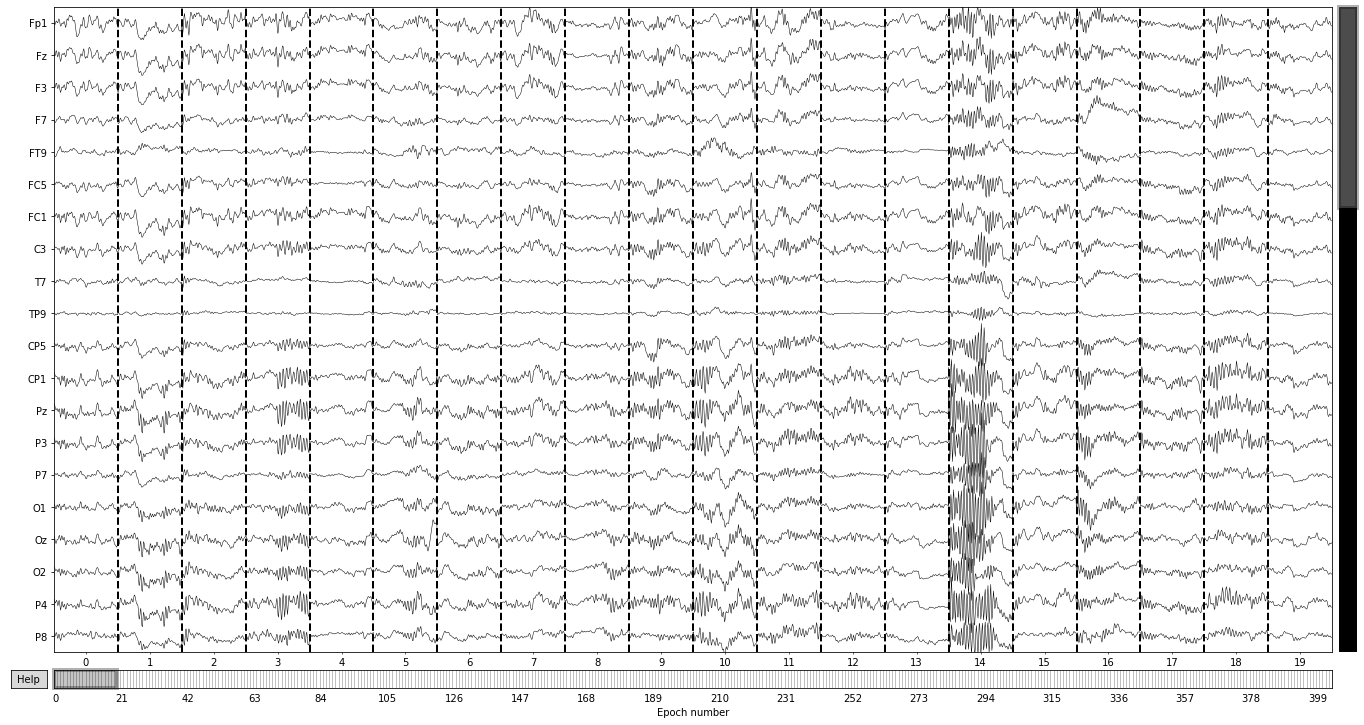

In [7]:
# MNE has some baked in functions for plotting epochs which are .... okay, I guess?
# This one is basically just raw.plot() with dashed lines separating the epochs
epoched_data.plot();

Loading data for 404 events and 231 original time points ...
Loading data for 20 events and 231 original time points ...


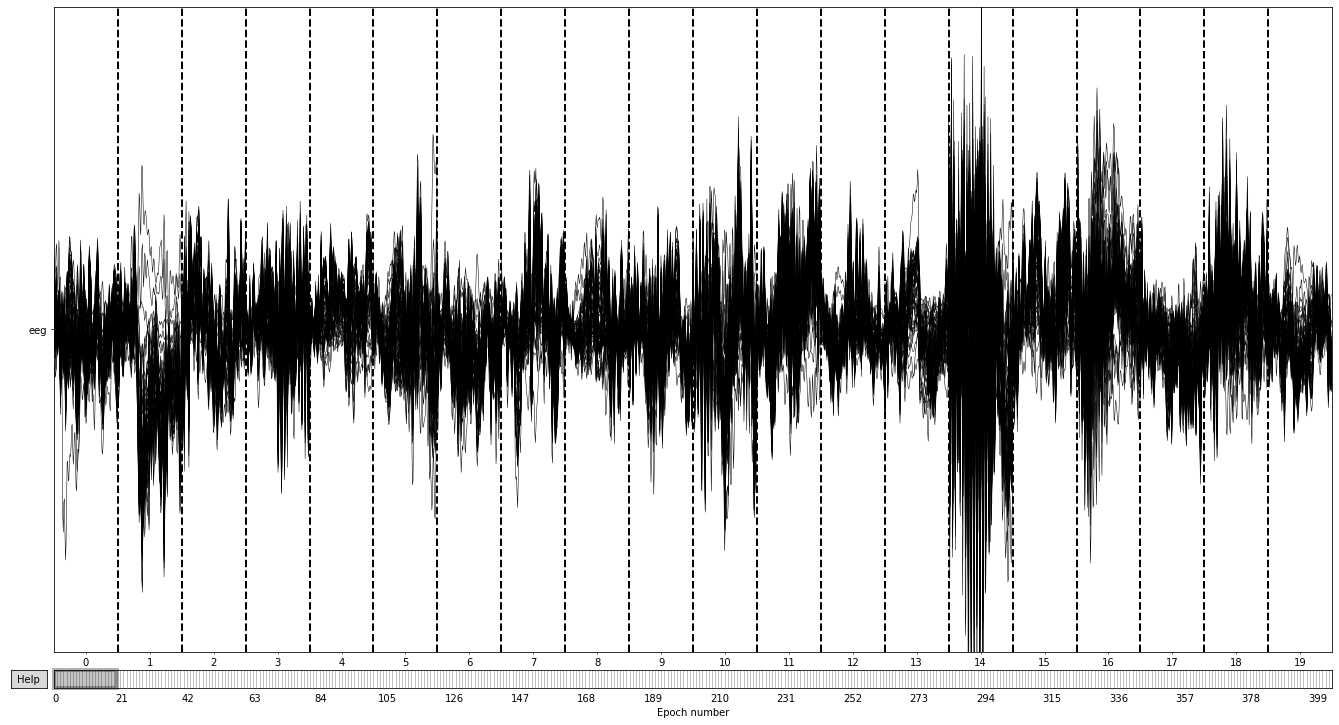

In [8]:
# This one is cursed... plots all the channels on top of one another instead of separating them out
# This is known as a "butterfly plot" but is really hard to interpret when the channels aren't in different colors.
# We will make a better butterfly plot later on using some custom Python magic
epoched_data.plot(butterfly=True);

Loading data for 404 events and 231 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


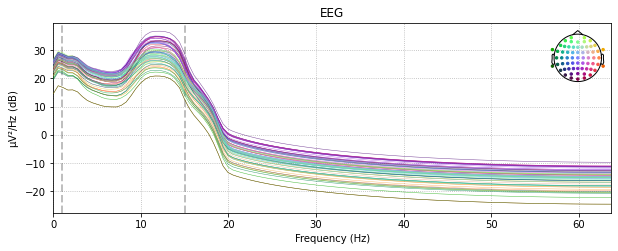

In [9]:
# Remember me?
epoched_data.plot_psd();

Loading data for 404 events and 231 original time points ...
Not setting metadata
Not setting metadata
404 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


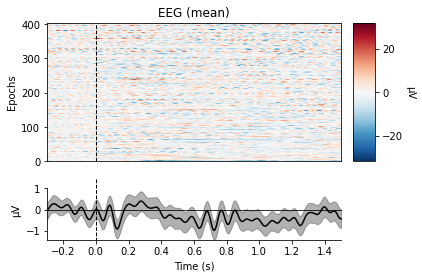

In [10]:
# This one is actually useful.
# On the top we have a plot of individual epochs over time
# On the bottom we have the "grand average" of all the epochs with error margin. This resembles a traditional "ERP figure"
# This plot can also help you find "bad epochs" in the same ways you'd look for a bad channel - one that is out of scale
# with the rest of the epochs
epoched_data.plot_image(combine='mean');

Loading data for 404 events and 231 original time points ...


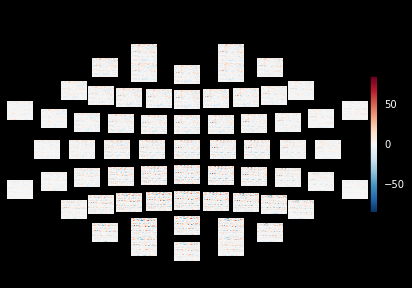

In [11]:
# Kind of interesting but ultimately not that useful.
# Plots individual channel epochs arranged in the montage so we can look for anatomical organization of events.
epoched_data.plot_topo_image();

In [12]:
# Commenting this cell out because it was throwing an error for me. This is my preferred way to look at topographic maps in MNE
# Well, besides an old function that was removed from MNE in a recent version :(
# that function, btw, is Epochs.plot_topomap(). works in MNE versions older than 0.18 i think.

# epoched_data.plot_projs_topomap();

## Visualizing epochs using Matplotlib
Matplotlib is a popular plotting library for Python, that is honestly prettier than MNE's built-in visualization tools in a lot of ways. There's just a few more steps we have to take in order to convert our epochs to a format that is recognizable by matplotlib, but it's totally worth it I promise!

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
# first we use Epochs.get_data() to convert our epochs to a numpy array
resp = epoched_data.get_data()
# The shape is n_epochs x n_channels x n_timepoints.
# That means, we have 404 epochs with 231 samples each. Oh and across 64 channels. That's a lot of data!
print(resp.shape)

Loading data for 404 events and 231 original time points ...
(404, 64, 231)


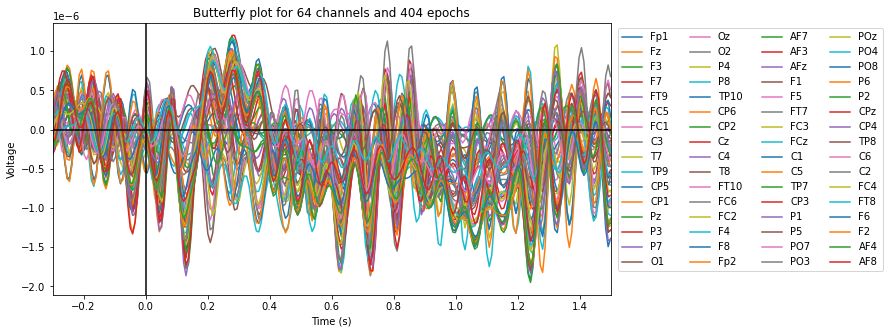

In [15]:
# Let's start with a better butterfly plot like I promised.
x = np.linspace(tmin,tmax,resp.shape[2]) # this is basically converting our X axis back from samples to timepoints in seconds
plt.figure(figsize=(10,5))
for i,ch in enumerate(raw.info['ch_names']): # Looping like this lets us plot each channel as its own line
    plt.plot(x,resp.mean(0)[i,:],label=ch);
# Add some lines for legibility
plt.axvline(0,color='k')
plt.axhline(0,color='k')
# Clean up the x axis
plt.gca().set_xlim([tmin,tmax])
# Axis labels
plt.xlabel("Time (s)");
plt.ylabel("Voltage");
nchans = len(raw.info['ch_names'])
plt.title(f'Butterfly plot for {nchans} channels and {resp.shape[0]} epochs')
# This legend is huge and obnoxious haha
plt.legend(bbox_to_anchor=(1.005,1),ncol=4);
# You can also save these plots to pdf with this function which is useful for figures in papers/posters (commented out):
# plt.savefig(file_name_goes_here, overwrite=True)

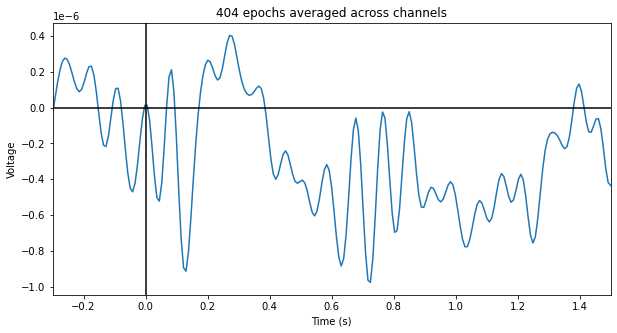

In [16]:
# Still pretty ugly, let's average across channels this time.
# This is a pretty impractical plot, but what you can do instead is pick certain channels when using Epochs.get_data()
# then average across those. To accomplish this you need the "picks" argument when you call get_data()
# which is just a list of channel names (or indices) that you want.
plt.figure(figsize=(10,5))
plt.plot(x,resp.mean(0).mean(0))
# Add some lines for legibility
plt.axvline(0,color='k')
plt.axhline(0,color='k')
# Clean up the x axis
plt.gca().set_xlim([tmin,tmax])
# Axis labels
plt.xlabel("Time (s)");
plt.ylabel("Voltage");
plt.title(f'{resp.shape[0]} epochs averaged across channels');

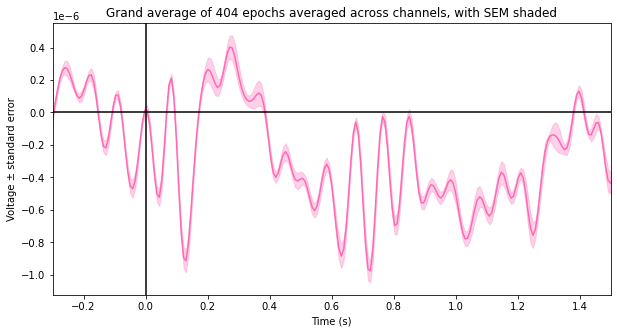

In [17]:
# We could make the above plot a little prettier by adding our error margin too.
def error_margin(resp):
    '''
    Calculate the standard error margin for a numpy array of shape channels x samples.
    '''
    sem_above = resp.mean(0) - resp.std(0)/np.sqrt(resp.shape[0])
    sem_below = resp.mean(0) + resp.std(0)/np.sqrt(resp.shape[0])
    return sem_above, sem_below

plt.figure(figsize=(10,5))
plt.plot(x,resp.mean(0).mean(0), color='hotpink') # you can play with color in matplotlib :) google for a reference sheet
sem_above, sem_below = error_margin(resp.mean(0))
plt.fill_between(x,sem_below,sem_above, color='hotpink', alpha=0.3);
# Add some lines for legibility
plt.axvline(0,color='k')
plt.axhline(0,color='k')
# Clean up the x axis
plt.gca().set_xlim([tmin,tmax])
# Axis labels
plt.xlabel("Time (s)");
plt.ylabel("Voltage ± standard error");
plt.title(f'Grand average of {resp.shape[0]} epochs averaged across channels, with SEM shaded');

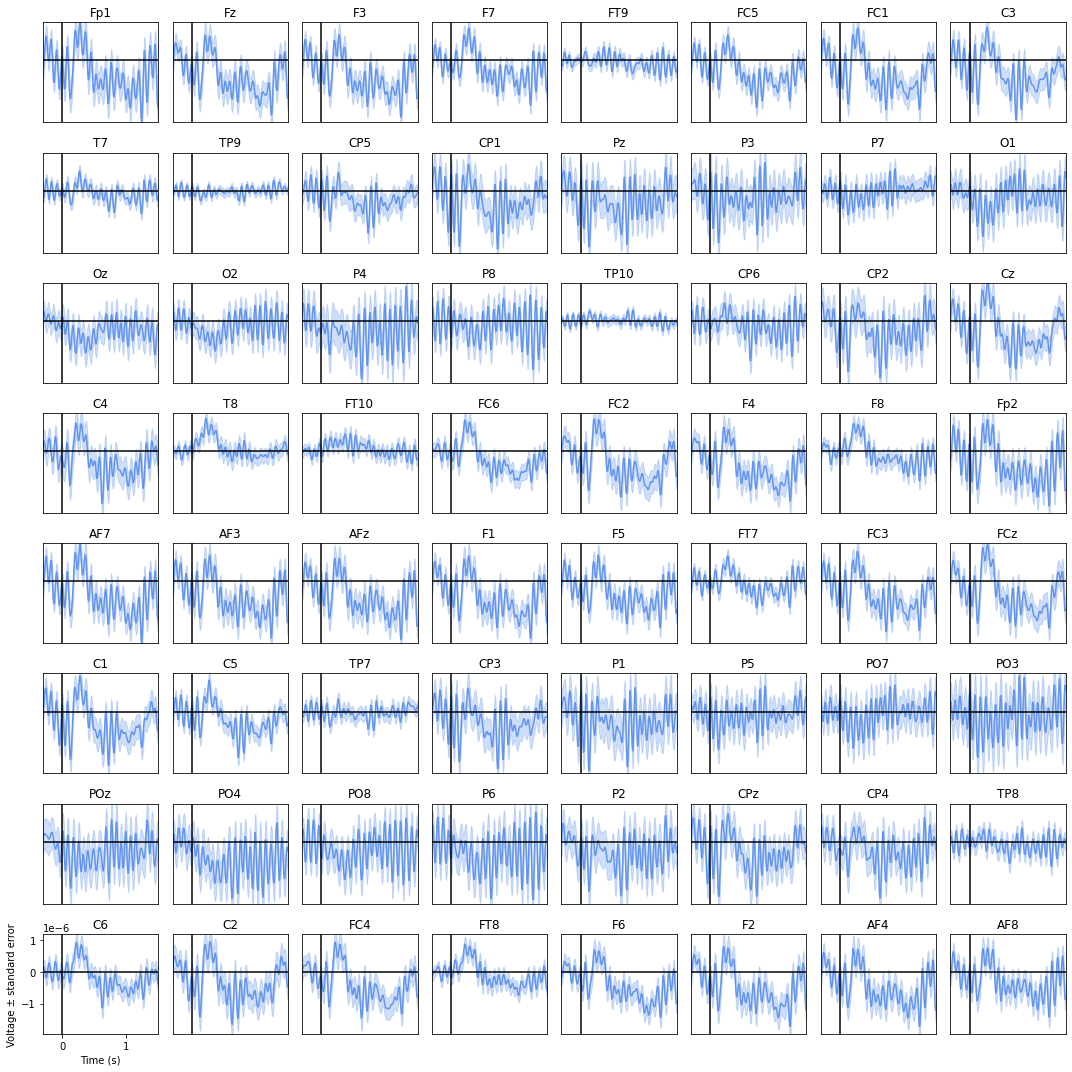

In [18]:
# Ok, what about a fancier way to visualize individual channels that isn't ugly like a butterfly plot?
# For this, we can use subplots
fig, ax = plt.subplots(nrows=8,ncols=8,figsize=(15,15))
for i,ch in enumerate(raw.info['ch_names']): # going channel-by-channel again but this time...
    plt.subplot(8,8,i+1) # we advance the subplot by 1 each time we go to a different channel.
    plt.plot(x,resp.mean(0)[i,:], color='cornflowerblue')
    # let's get real fancy and add errorbars again
    sem_above, sem_below = error_margin(resp[:,i,:])
    plt.fill_between(x,sem_below,sem_above, color='cornflowerblue', alpha=0.3);
    # Add some lines for legibility
    plt.axvline(0,color='k')
    plt.axhline(0,color='k')
    # Clean up the x axis
    plt.gca().set_xlim([tmin,tmax])
    # Normalize y axis range in all subplots so it's easier to compare between subplots
    max_volt = np.max(resp.mean(0))
    min_volt = np.min(resp.mean(0))
    plt.gca().set_ylim([min_volt,max_volt])
    # Instead of doing axis labels on all the plots, we will just do it on one subplot (bottom left) to save space.
    if i == 56:
        plt.xlabel("Time (s)");
        plt.ylabel("Voltage ± standard error");
    else: # remove axis ticks from all other plots to save space
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.gca().axes.get_yaxis().set_visible(False)
    # Lastly, set the subplot title to the channel name so we know which one we are looking at!
    plt.title(ch);
# This is a nice function that normalizes space across items in the plot. IDK how to explain it
# Only run it once at the end of everything else in your plot. Try it on/off and see which one you think looks better!
# (I happen to like it here)
plt.tight_layout(); 

## The opportunities with `matplotlib` are endless!
How to visualize your data, ultimately, comes down to how you want to present your results. Some things that I frequently reference while plotting data:
* [Matplotlib documentation](https://matplotlib.org/stable/contents.html) -- When in doubt, look it up. 
* [Matplotlib color cheatsheet](https://matplotlib.org/stable/gallery/color/named_colors.html) -- Theoretically, you can use any RGB or hex value in `matplotlib` but the named colors are very convenient for quick plotting. I have a few I like to use from this list (that you saw in this notebook!)
* [This collection of matplotlib cheatsheets](https://github.com/rougier/matplotlib-cheatsheet) -- Really great reference for remembering how to do stuff. `matplotlib` can feel very overwhelming with how many parameters there are to tweak so it's nice to have things like this on hand.

## BONUS CHALLENGE
You may have noticed that I only used `sentence_events.txt` in this notebook, but in the GitHub repo, there are two more files: `word_events.txt` and `phoneme_events.txt`. That's right! I included some more event files for (you guessed it) word and phoneme epochs. If you are feeling up to the challenge, try to use those event files instead to produce similar plots to the ones featured in this notebook, namely the `matplotlib` ones:
* a butterfly plot
* a grand average ERP with errorbars
* a channel-by-channel plot with errorbars

Good luck!

In [19]:
## YOUR CODE HERE ##